# IRIS DATASET CLASSIFICATION USING LOGISTIC REGRESSION

In [59]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression  

In [84]:
# Load the dataset from a CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\NAIB\Downloads\archive (19)\IRIS.csv")

# Display the first 5 rows of the DataFrame to inspect the data
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
df.shape  # Check the dimensions of the DataFrame (number of rows, number of columns)


(150, 5)

In [61]:
df.info()# Display information about the DataFrame, including data types, non-null counts, and memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [62]:
df.describe() # Generate descriptive statistics of the DataFrame's numerical columns


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
df.isnull().sum() # Count the number of missing (null) values in each column of the DataFrame


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [64]:
df['species'].value_counts() # count the values of flower in species

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

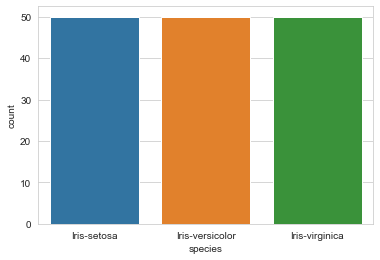

In [65]:
sns.countplot(x=df['species'])# Create a counplot to visualize the distribution of 'species' values


<AxesSubplot:xlabel='species', ylabel='petal_length'>

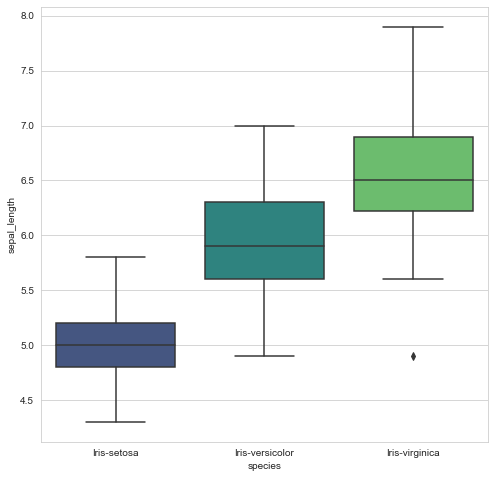

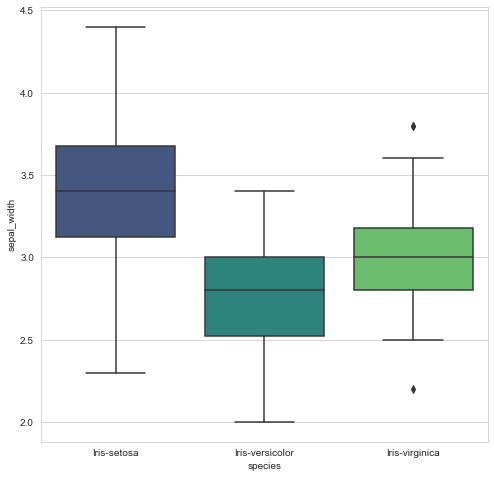

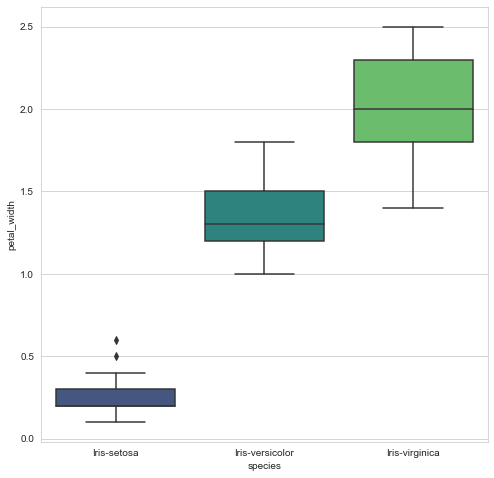

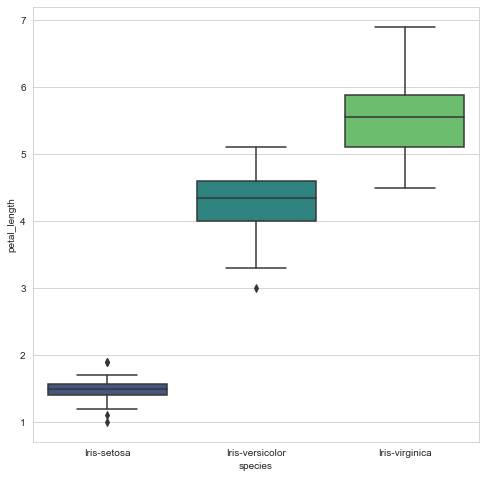

In [66]:
#plot the box of species with respect to each attribute

plt.figure(figsize=(8,8))
sns.boxplot(x='species',data=df,y='sepal_length',palette = "viridis")
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x='species',y='sepal_width',palette='viridis')
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x='species',y='petal_width',palette='viridis')
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x='species',y='petal_length',palette='viridis')

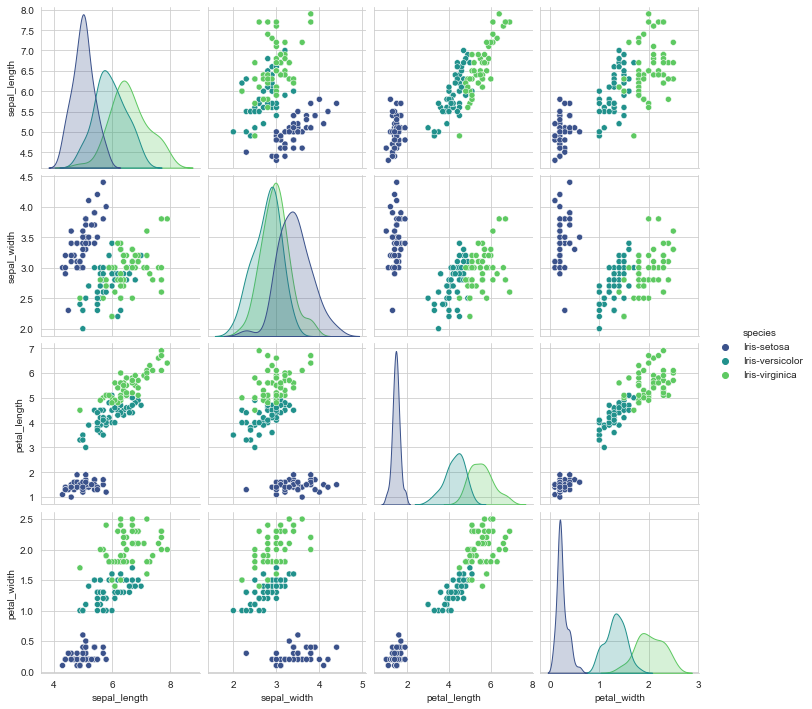

In [67]:
#plot pairplot to the data frame  

sns.set_style('whitegrid')

sns.pairplot(df,hue='species',palette='viridis')

In [68]:
# Create a new DataFrame 'X' by dropping the 'quality' column from the original DataFrame

X=df.drop('species',axis=1)
y=df['species']

In [69]:
# Split the data into training and testing sets
# X_train: Features for training
# X_test: Features for testing
# y_train: Target labels for training
# y_test: Target labels for testing
# test_size=0.2: 20% of the data is used for testing, and 80% for training
# random_state=2: A random seed for reproducibility

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
#printing the data

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [71]:
# Create a Logistic Regression model

model=LogisticRegression()


In [72]:
# Train the Linear Regression model on the training data

model.fit(X_train,y_train)

LogisticRegression()

In [73]:
# Make predictions using the trained Logistic Regression model

pred=model.predict(X_test)
pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [79]:
#calculate the accuracy of model

accuracy=accuracy_score(y_test,pred)
print(f'accuracy of the model is:{accuracy}')

accuracy of the model is:0.9666666666666667


In [83]:
#Generating the report of the model

report=classification_report(y_test,pred)
print('classification report:\n',report)

classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In this classification task using the Iris dataset, logistic regression was employed to predict iris species based on sepal and petal measurements. The dataset was divided into training and testing sets, and the model achieved an impressive accuracy of 96%, signifying its effectiveness in correctly classifying iris species. This outcome underscores the informativeness of the selected features and demonstrates skill in machine learning model application and evaluation on real-world datasets.